In [606]:
import numpy as np

In [607]:
x = np.load('First.npy',allow_pickle=True).item()

In [608]:
y = x['xmax']
y1 = x['X_o']
y2 = x['chi2_xmax']

In [609]:
import matplotlib.pylab as plt

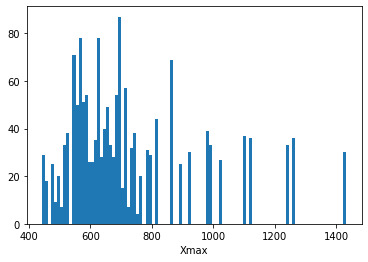

In [610]:
plt.hist(y,bins=100)
plt.xlabel('Xmax')
plt.savefig('Xmax.png')

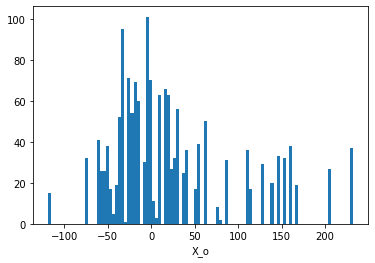

In [611]:
plt.hist(y1,bins=100)
plt.xlabel('X_o')
plt.savefig('X_o.png')

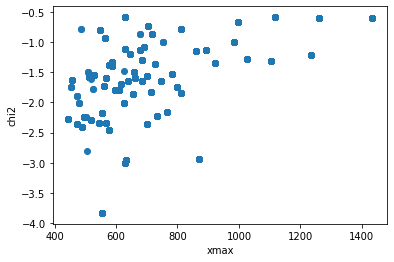

1639


In [612]:
plt.scatter(y,np.log10(y2))
plt.xlabel('xmax')
plt.ylabel('chi2')
plt.show()
count = 0
for i in np.log10(y2):
    if i > 10:
        break
    else:
        count+=1
print(count)

In [613]:
depth = x['depth']
N = x['sum_value']
depth_prediction = x['depth_reduced']
N_prediction = x['sum_value_prediction']

In [614]:
def filter(x,y,trial):
    value = zip(x[trial],y[trial]/max(y[trial]))
    output = []
    for i in value:
        if i[1] == 0:
            continue
        else:
            output.append(i)
    return list(zip(*output))[0],list(zip(*output))[1]

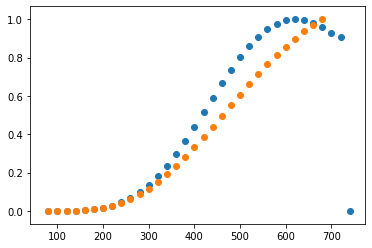

In [615]:
trial = 906
plot_values= filter(depth,N,trial)
plot_values2 = filter(depth_prediction,N_prediction,trial)
plt.scatter(plot_values[0],plot_values[1])
plt.scatter(plot_values2[0],plot_values2[1])
plt.show()

In [623]:
from scipy.stats import chisquare
from scipy.optimize import curve_fit

def Gaisser_hillas_function(x,m,alpha,b,a):
    n = m*np.log(alpha*(x-a))-alpha*x + b
    return n

def get_Xmax(depth,num):
    popt,pcov = curve_fit(Gaisser_hillas_function,depth,num,bounds=((0,0,-np.inf,-np.inf),(np.inf,np.inf,np.inf,min(depth))))
    return popt

def Gaisser_exp(x,m,alpha,b,a):
    n = np.exp(Gaisser_hillas_function(x,m,alpha,b,a))
    return n

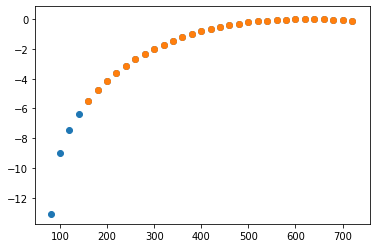

In [657]:
predict1 = plot_values[0][0:len(plot_values[0])-1]
predict2 = np.log(plot_values[1][0:len(plot_values[1])-1])
plt.scatter(predict1,predict2)
new_values = []
for i in zip(predict1,predict2):
    if i[1] < -6:
        continue
    else:
        new_values.append(i)
new_values = np.array(list(zip(*new_values)) ) 
plt.scatter(new_values[0],new_values[1])
check_values = get_Xmax(new_values[0],new_values[1])

[6.28218200e-05 2.37621907e-04 7.23202547e-04 1.86257882e-03
 4.20251468e-03 8.51628051e-03 1.57890125e-02 2.71605116e-02
 4.38295719e-02 6.69319865e-02 9.74094307e-02 1.35887754e-01
 1.82581093e-01 2.37233591e-01 2.99104610e-01 3.66997321e-01
 4.39325437e-01 5.14209108e-01 5.89589000e-01 6.63347098e-01
 7.33423680e-01 7.97921732e-01 8.55192469e-01 9.03898160e-01
 9.43050883e-01 9.72027920e-01 9.90566100e-01 9.98738519e-01
 9.96917679e-01 9.85729237e-01 9.66000446e-01 9.38706883e-01
 9.04920526e-01]


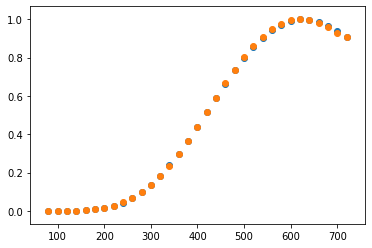

In [658]:
u = np.array(plot_values[0][0:len(plot_values[0])-1])
v = Gaisser_exp(u,check_values[0],check_values[1],check_values[2],check_values[3])
plt.scatter(u,v)
plt.scatter(u,plot_values[1][0:len(plot_values[1])-1])
plt.plot()
print(v)

In [399]:
y[906]

782.509381205473

In [592]:
y

array([479.83162845, 479.83162845, 479.83162845, ..., 658.02546768,
       658.02546768, 658.02546768])

In [601]:
y[0:(y.shape[0]-2)].shape

(1637,)